In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from matplotlib.colors import ListedColormap

import nnfs.datasets
import nnfs

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
from model.neural_network import NeuralNetwork

from model.layers.dense import DenseLayer
from model.layers.dropout import DropoutLayer
from model.optimizers.adam import Adam

# Regression Testing

In [7]:
x, y = nnfs.datasets.sine_data()

model = NeuralNetwork([
    DenseLayer(1, 16, activation='Tanh'),
    DenseLayer(16, 8, activation='Tanh'),
    DenseLayer(8, 1)
])

model.set(
    loss='MeanSquaredError',
    optimizer=Adam(learning_rate=0.01, decay=1e-4)
)

model.train(x, y, epochs=10000, patience=500, min_delta=0.001)

epoch: 0, loss: 0.50000, acc: 0.00%, lr: 0.0100000000
epoch: 100, loss: 0.15523, acc: 68.95%, lr: 0.0099019705
epoch: 200, loss: 0.02792, acc: 94.42%, lr: 0.0098048828
epoch: 300, loss: 0.01116, acc: 97.77%, lr: 0.0097096806
epoch: 400, loss: 0.00019, acc: 99.96%, lr: 0.0096163093
epoch: 500, loss: 0.00006, acc: 99.99%, lr: 0.0095247166
epoch: 600, loss: 0.00015, acc: 99.97%, lr: 0.0094348523
epoch: 700, loss: 0.00004, acc: 99.99%, lr: 0.0093466679
epoch: 800, loss: 0.00003, acc: 99.99%, lr: 0.0092601167
epoch: 900, loss: 0.00003, acc: 99.99%, lr: 0.0091751537

Early stopping triggered at epoch 900
Best loss: 0.00019


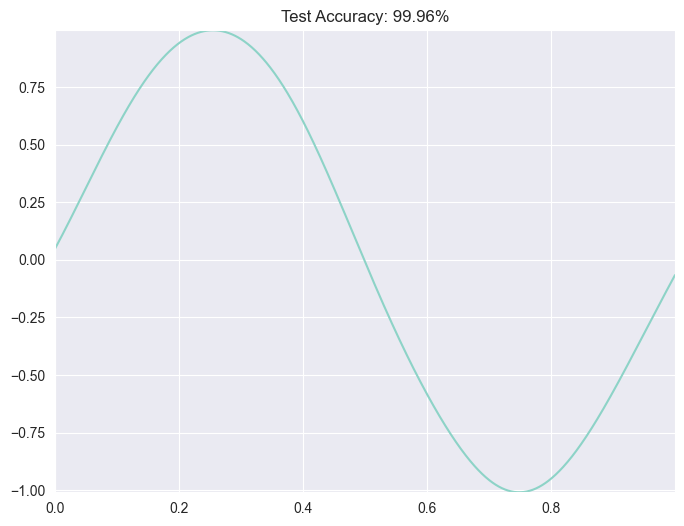

In [8]:
x_test, y_test = nnfs.datasets.sine_data()
accuracy = model.evaluate(x_test, y_test)

outputs = model.forward(x_test)

plt.figure(figsize=(8, 6))
plt.xlim(x_test.min(), x_test.max())
plt.ylim(outputs.min(), outputs.max())
plt.title(f'Test Accuracy: {accuracy:.2f}%')
plt.plot(x_test, outputs)
plt.show()

# Classification Testing

In [17]:
x, y = nnfs.datasets.spiral_data(1000, classes=2)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

model = NeuralNetwork([
    DenseLayer(2, 128, activation='Relu', weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4),
    DropoutLayer(rate=0.1),
    DenseLayer(128, 64, activation='Relu'),
    DropoutLayer(rate=0.1),
    DenseLayer(64, 1, activation='Sigmoid')
])

model.set(
    loss='BinaryCrossentropy',
    optimizer=Adam(decay=5e-7)
)

model.train(x_train, y_train, epochs=10000, validation_data=(x_test, y_test), patience=500, min_delta=0.001)

epoch: 0, loss: 0.69316, acc: 45.00%, lr: 0.0010000000
epoch: 100, loss: 0.68642, acc: 57.75%, lr: 0.0009999505
epoch: 200, loss: 0.67501, acc: 57.50%, lr: 0.0009999005
epoch: 300, loss: 0.62758, acc: 64.00%, lr: 0.0009998505
epoch: 400, loss: 0.52882, acc: 77.00%, lr: 0.0009998005
epoch: 500, loss: 0.51713, acc: 79.00%, lr: 0.0009997506
epoch: 600, loss: 0.41578, acc: 84.50%, lr: 0.0009997006
epoch: 700, loss: 0.38787, acc: 82.25%, lr: 0.0009996506
epoch: 800, loss: 0.35512, acc: 85.00%, lr: 0.0009996007
epoch: 900, loss: 0.34539, acc: 88.00%, lr: 0.0009995507
epoch: 1000, loss: 0.28711, acc: 88.75%, lr: 0.0009995007
epoch: 1100, loss: 0.28356, acc: 89.75%, lr: 0.0009994508
epoch: 1200, loss: 0.22298, acc: 91.75%, lr: 0.0009994009
epoch: 1300, loss: 0.26516, acc: 91.50%, lr: 0.0009993509
epoch: 1400, loss: 0.23446, acc: 96.25%, lr: 0.0009993010
epoch: 1500, loss: 0.20253, acc: 92.50%, lr: 0.0009992511
epoch: 1600, loss: 0.21648, acc: 94.75%, lr: 0.0009992011
epoch: 1700, loss: 0.18470

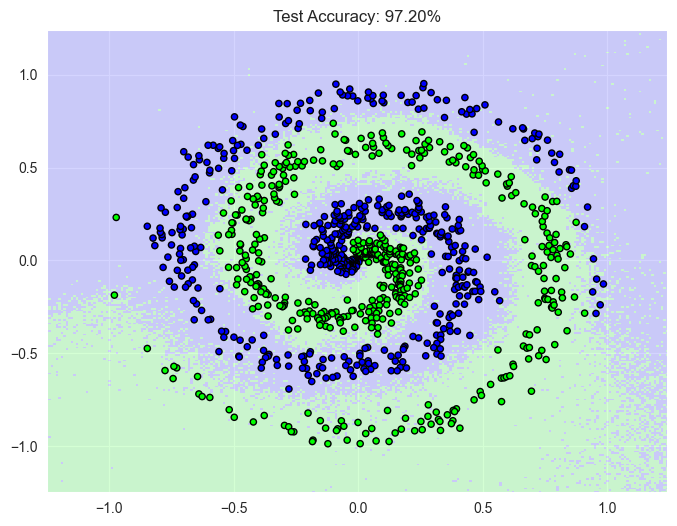

In [18]:
x_test, y_test = nnfs.datasets.spiral_data(samples=500, classes=2)
outputs = model.forward(x_test)

h = 0.01
x_min, x_max = -1.25, 1.25
y_min, y_max = -1.25, 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_outputs = model.forward(grid_points)
z = (grid_outputs > 0.5).astype(int).reshape(xx.shape)

cmap_light = ListedColormap(['#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#00FF00', '#0000FF'])
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, z, cmap=cmap_light, alpha=0.5)

y_test = y_test.reshape(-1, 1)
accuracy = model.evaluate(x_test, y_test)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'Test Accuracy: {accuracy:.2f}%')
plt.show()

In [3]:
x, y = nnfs.datasets.spiral_data(1000, classes=3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = NeuralNetwork([
    DenseLayer(2, 128, activation='Relu', weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4),
    DropoutLayer(rate=0.1),
    DenseLayer(128, 64, activation='Relu'),
    DropoutLayer(rate=0.1),
    DenseLayer(64, 3, activation='Softmax')
])

model.set(
    loss='CategoricalCrossentropy',
    optimizer=Adam(decay=5e-7)
)

model.train(x_train, y_train, epochs=10000, validation_data=(x_test, y_test), patience=500, min_delta=0.001)

epoch: 0, loss: 1.09863, acc: 25.67%, lr: 0.0010000000
epoch: 100, loss: 1.06432, acc: 43.83%, lr: 0.0009999505
epoch: 200, loss: 1.03984, acc: 40.83%, lr: 0.0009999005
epoch: 300, loss: 0.97521, acc: 51.17%, lr: 0.0009998505
epoch: 400, loss: 0.84496, acc: 58.17%, lr: 0.0009998005
epoch: 500, loss: 0.79318, acc: 65.83%, lr: 0.0009997506
epoch: 600, loss: 0.71351, acc: 68.67%, lr: 0.0009997006
epoch: 700, loss: 0.65513, acc: 71.33%, lr: 0.0009996506
epoch: 800, loss: 0.61158, acc: 75.33%, lr: 0.0009996007
epoch: 900, loss: 0.58873, acc: 79.83%, lr: 0.0009995507
epoch: 1000, loss: 0.53574, acc: 77.00%, lr: 0.0009995007
epoch: 1100, loss: 0.52660, acc: 83.17%, lr: 0.0009994508
epoch: 1200, loss: 0.51768, acc: 79.33%, lr: 0.0009994009
epoch: 1300, loss: 0.51028, acc: 81.67%, lr: 0.0009993509
epoch: 1400, loss: 0.49939, acc: 82.17%, lr: 0.0009993010
epoch: 1500, loss: 0.52644, acc: 82.00%, lr: 0.0009992511
epoch: 1600, loss: 0.50461, acc: 84.67%, lr: 0.0009992011
epoch: 1700, loss: 0.48393

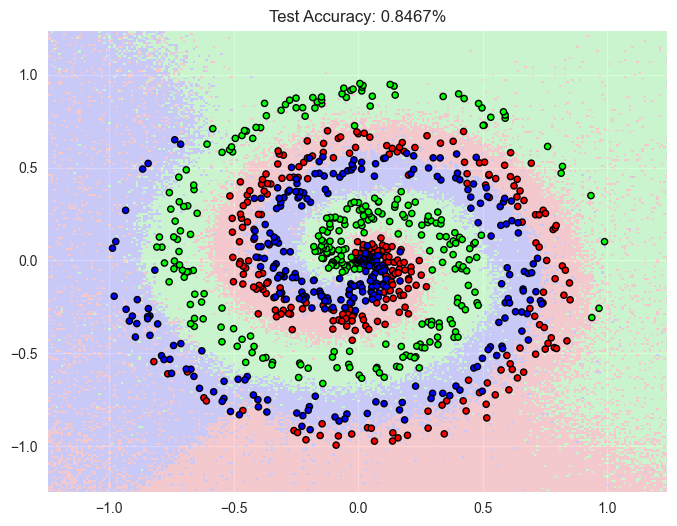

In [4]:
x_test, y_test = nnfs.datasets.spiral_data(samples=300, classes=3)
outputs = model.forward(x_test)

h = 0.01
x_min, x_max = -1.25, 1.25
y_min, y_max = -1.25, 1.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_outputs = model.forward(grid_points)
z = np.argmax(grid_outputs, axis=1)
z = z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, z, cmap=cmap_light, alpha=0.5)

predictions = np.argmax(outputs, axis=1)
accuracy = np.mean(predictions == y_test)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'Test Accuracy: {accuracy:.4f}%')
plt.show()